## Step 1: Load the dataset

In [ ]:
import os
import librosa
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt

data_dir = './data/genres_original'  # Path to dataset directory
genres = os.listdir(data_dir)  # List of genre names

dataset = []  # List to store MFCCs and genre labels
for genre in genres:
    genre_dir = os.path.join(data_dir, genre)  # Path to genre directory
    for filename in os.listdir(genre_dir):
        songname = os.path.join(genre_dir, filename)  # Path to song file
        try:
            y, sr = librosa.load(songname, duration=30)  # Load audio file with duration of 30 seconds
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract MFCCs
            dataset.append((mfcc, genre))  # Append MFCCs and genre label to dataset list
        except:
            print(f'Error loading {songname}. Skipping...')
            continue

/Users/drewwhite/Desktop/Programming/Projects/musical_journeys/venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: PySoundFile failed. Trying audioread instead.
/Users/drewwhite/Desktop/Programming/Projects/musical_journeys/venv/lib/python3.7/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading ./data/genres_original/jazz/jazz.00054.wav. Skipping...


## Step 2: Split the dataset into training and testing sets

In [ ]:
X, y = zip(*dataset)  # Unzip the MFCCs and genre labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split into train and test sets

## Step 3: Reshape and scale the input features

In [ ]:
# Find the maximum number of frames in the dataset
max_frames = max([x.shape[1] for x in X_train + X_test])

# Pad or truncate the MFCCs to have the same number of frames
X_train = np.array([np.pad(x, ((0, 0), (0, max_frames - x.shape[1])), mode='constant') for x in X_train])
X_test = np.array([np.pad(x, ((0, 0), (0, max_frames - x.shape[1])), mode='constant') for x in X_test])

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(len(X_train), -1)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(len(X_test), -1)).reshape(X_test.shape)


## Step 4: Train and evaluate the model

In [ ]:
X_train_flat = np.reshape(X_train, (X_train.shape[0], -1))
X_test_flat = np.reshape(X_test, (X_test.shape[0], -1))

model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize Random Forest model
model.fit(X_train_flat, y_train) # Train on train set
y_pred = model.predict(X_test_flat)  # Predict on test set
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy score
print(f'Accuracy: {accuracy:.2f}')  # Print accuracy score

Accuracy: 0.52


## Step 5: Visualize the confusion matrix

/Users/drewwhite/Desktop/Programming/Projects/musical_journeys/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


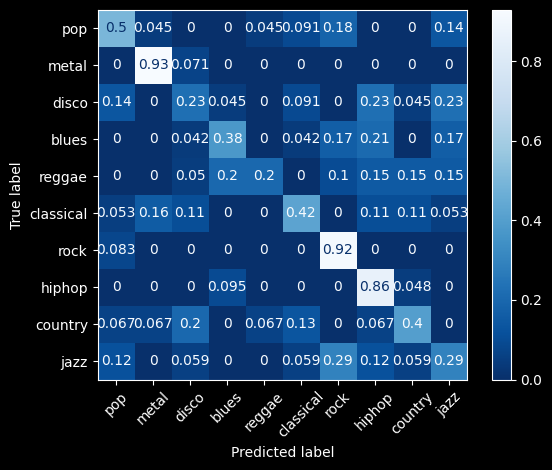

In [ ]:
plt.style.use('dark_background')
plot_confusion_matrix(model, X_test_flat, y_test, display_labels=genres, cmap=plt.cm.Blues_r, normalize='true', xticks_rotation=45)
plt.show()  # Show confusion matrix

## Recommendation System

In [ ]:
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

# Read features_30_sec
file_path = './data'
df = pd.read_csv(f'{file_path}/features_30_sec.csv', index_col='filename')

# Pull labels
labels = df[['label']]

# Drop labels from df
df = df.drop(columns=['length', 'label'])
df.head()

# Scale df
df_scaled = preprocessing.scale(df)
print('Scaled data:', type(df_scaled))

Scaled data: <class 'numpy.ndarray'>


## Cosine Similarity
Method of calculating the similarity of two vectors by taking the dot product and dividing it by the magnitudes of each vector, as shown by the illustration below: Image by Author. Using python we can actually convert text and images to vectors and apply this same logic!

In [ ]:
# Cosine similarity
similarity = cosine_similarity(df_scaled)
print("Similarity shape:", similarity.shape)

# Convert into a dataframe and then set the row index and column names as labels
sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index

sim_df_names.head()

Similarity shape: (1000, 1000)


filename,blues.00000.wav,blues.00001.wav,blues.00002.wav,blues.00003.wav,blues.00004.wav,blues.00005.wav,blues.00006.wav,blues.00007.wav,blues.00008.wav,blues.00009.wav,...,rock.00090.wav,rock.00091.wav,rock.00092.wav,rock.00093.wav,rock.00094.wav,rock.00095.wav,rock.00096.wav,rock.00097.wav,rock.00098.wav,rock.00099.wav
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,1.000000,0.049231,0.589618,0.284862,0.025561,-0.346688,-0.219483,-0.167626,0.641877,-0.097889,...,-0.082829,0.546169,0.578558,0.662590,0.571629,0.610942,0.640835,0.496294,0.284958,0.304098
blues.00001.wav,0.049231,1.000000,-0.096834,0.520903,0.080749,0.307856,0.318286,0.415258,0.120649,0.404168,...,-0.098111,-0.325126,-0.370792,-0.191698,-0.330834,-0.077301,-0.222119,-0.302573,0.499562,0.311723
blues.00002.wav,0.589618,-0.096834,1.000000,0.210411,0.400266,-0.082019,-0.028061,0.104446,0.468113,-0.132532,...,-0.032408,0.561074,0.590779,0.583293,0.514537,0.495707,0.566837,0.589983,0.216378,0.321069
blues.00003.wav,0.284862,0.520903,0.210411,1.000000,0.126437,0.134796,0.300746,0.324566,0.352758,0.295184,...,-0.320107,-0.206516,-0.151132,0.041986,-0.172515,-0.000287,0.020515,-0.107821,0.502279,0.183210
blues.00004.wav,0.025561,0.080749,0.400266,0.126437,1.000000,0.556066,0.482195,0.623455,0.029703,0.471657,...,0.087605,0.017366,0.138035,0.104684,-0.034594,0.063454,0.063546,0.172944,0.153192,0.061785


## Song Recommendation Function

In [ ]:
ipd.Audio(f'{file_path}/genres_original/metal/metal.00015.wav')


Dark Tranquility - Nightfall by the Shore of Time